# Introduction to geospatial vector data in Python

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import geopandas as gpd

pd.options.display.max_rows = 10

## Importing geospatial data

Geospatial data is often available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database, ...

We can use the GeoPandas library to read many of those GIS file formats (relying on the `fiona` library under the hood, which is an interface to GDAL/OGR), using the `geopandas.read_file` function.

For example, let's start by reading a shapefile with all the countries of the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/, zip file is available in the `/data` directory), and inspect the data:

In [4]:
countries = gpd.read_file("zip://./data/ne_110m_admin_0_countries.zip")
# or if the archive is unpacked:
# countries = gpd.read_file("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [5]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


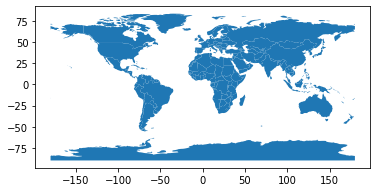

In [6]:
countries.plot()

What can we observe:

- Using `.head()` we can see the first rows of the dataset, just like we can do with Pandas.
- There is a 'geometry' column and the different countries are represented as polygons
- We can use the `.plot()` method to quickly get a *basic* visualization of the data

## What's a GeoDataFrame?

We used the GeoPandas library to read in the geospatial data, and this returned us a `GeoDataFrame`:

In [7]:
type(countries)

geopandas.geodataframe.GeoDataFrame

A GeoDataFrame contains a tabular, geospatial dataset:

* It has a **'geometry' column** that holds the geometry information (or features in GeoJSON).
* The other columns are the **attributes** (or properties in GeoJSON) that describe each of the geometries

Such a `GeoDataFrame` is just like a pandas `DataFrame`, but with some additional functionality for working with geospatial data:

* A `.geometry` attribute that always returns the column with the geometry information (returning a GeoSeries). The column name itself does not necessarily need to be 'geometry', but it will always be accessible as the `.geometry` attribute.
* It has some extra methods for working with spatial data (area, distance, buffer, intersection, ...), which we will see in later notebooks

In [8]:
countries.geometry

0      POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1      MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2      POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3      POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4      MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
                             ...                        
172    MULTIPOLYGON (((167.84488 -16.46633, 167.51518...
173    POLYGON ((52.00001 19.00000, 52.78218 17.34974...
174    POLYGON ((19.89577 -24.76779, 20.16573 -24.917...
175    POLYGON ((23.21505 -17.52312, 22.56248 -16.898...
176    POLYGON ((29.43219 -22.09131, 28.79466 -21.639...
Name: geometry, Length: 177, dtype: geometry

In [9]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

In [10]:
countries.geometry.area

0       63.593500
1      103.599439
2        3.185163
3        7.095047
4      278.923392
          ...    
172      0.631326
173     38.475618
174    112.718524
175     62.789498
176     32.280371
Length: 177, dtype: float64

**It's still a DataFrame**, so we have all the pandas functionality available to use on the geospatial dataset, and to do data manipulations with the attributes and geometry information together.

For example, we can calculate average population number over all countries (by accessing the 'pop_est' column, and calling the `mean` method on it):

In [12]:
countries['pop_est'].mean()

41712369.84180791

Or, we can use boolean filtering to select a subset of the dataframe based on a condition:

In [15]:
africa = countries[countries['continent'] == 'Africa']

In [16]:
africa.head(7)

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
11,BDI,Burundi,Africa,11466756.0,7892.0,"POLYGON ((29.34000 -4.49998, 29.27638 -3.29391..."
13,BEN,Benin,Africa,11038805.0,24310.0,"POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1...."
14,BFA,Burkina Faso,Africa,20107509.0,32990.0,"POLYGON ((2.15447 11.94015, 1.93599 11.64115, ..."
25,BWA,Botswana,Africa,2214858.0,35900.0,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827..."
26,CAF,Central African Rep.,Africa,5625118.0,3206.0,"POLYGON ((15.27946 7.42192, 16.10623 7.49709, ..."
31,CIV,Côte d'Ivoire,Africa,24184810.0,87120.0,"POLYGON ((-5.40434 10.37074, -4.95465 10.15271..."


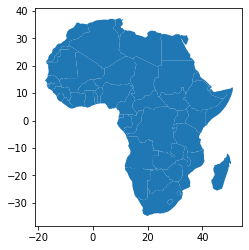

In [14]:
africa.plot()

---

The rest of the tutorial is going to assume you already know some pandas basics, but we will try to give hints for that part for those that are not familiar.   
A few resources in case you want to learn more about pandas:

- Pandas docs: https://pandas.pydata.org/pandas-docs/stable/10min.html
- Other tutorials: chapter from pandas in https://jakevdp.github.io/PythonDataScienceHandbook/, https://github.com/jorisvandenbossche/pandas-tutorial, https://github.com/TomAugspurger/pandas-head-to-tail, ...

<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b>: <br>

<ul>
  <li>A `GeoDataFrame` allows to perform typical tabular data analysis together with spatial operations</li>
  <li>A `GeoDataFrame` (or *Feature Collection*) consists of:
   <ul>
    <li>**Geometries** or **features**: the spatial objects</li>
    <li>**Attributes** or **properties**: columns with information about each spatial object</li>
   </ul>
  </li>
</ul>
</div>

## Geometries: Points, Linestrings and Polygons

Spatial **vector** data can consist of different types, and the 3 fundamental types are:

* **Point** data: represents a single point in space.
* **Line** data ("LineString"): represents a sequence of points that form a line.
* **Polygon** data: represents a filled area.

And each of them can also be combined in multi-part geometries (See https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects for extensive overview).

For the example we have seen up to now, the individual geometry objects are Polygons:

In [12]:
print(countries.geometry[2])

POLYGON ((21.0200403174764 40.84272695572588, 20.99998986174722 40.58000397395401, 20.67499677906363 40.43499990494303, 20.61500044117275 40.11000682225935, 20.15001590341052 39.62499766698397, 19.98000044117015 39.69499339452341, 19.96000166187321 39.91500580500605, 19.40608198413673 40.25077342382247, 19.31905887215714 40.72723012955356, 19.40354983895429 41.40956574153546, 19.54002729663711 41.71998607031276, 19.37176883309496 41.87754751237065, 19.37176816334725 41.8775506797835, 19.30448611825079 42.19574514420782, 19.73805138517963 42.68824738216557, 19.80161339689869 42.50009349219084, 20.07070000000004 42.58863000000008, 20.28375451018189 42.32025950781508, 20.52295000000004 42.21787000000006, 20.59024654668023 41.85540891928363, 20.59024743010491 41.85540416113361, 20.4631750830992 41.51508901627534, 20.60518191903736 41.08622630468523, 21.0200403174764 40.84272695572588))


Let's import some other datasets with different types of geometry objects.

A dateset about cities in the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/, zip file is available in the `/data` directory), consisting of Point data:

In [17]:
cities = gpd.read_file("zip://./data/ne_110m_populated_places.zip")

In [18]:
print(cities.geometry[0])

POINT (12.45338654497177 41.90328217996012)


And a dataset of rivers in the world (from http://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-rivers-lake-centerlines/, zip file is available in the `/data` directory) where each river is a (multi-)line:

In [19]:
rivers = gpd.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

In [20]:
print(rivers.geometry[0])

LINESTRING (51.9371337598152 55.70106609892139, 51.88086646731369 55.68625891701544, 51.82031249962222 55.69745514553858, 51.7476018274624 55.69366250841807, 51.6628417966117 55.60817291874525, 51.57871093775964 55.59943268477065, 51.51342773400279 55.58312409100404, 51.50854492161091 55.52948639548083, 51.48583984403365 55.49640534033426, 51.36914062543957 55.46796295772435, 51.21306254869774 55.50264985760492, 51.13452148447897 55.48273346527725, 51.07934570274205 55.46759674659262, 50.98022460947817 55.46637604371949, 50.83445217522774 55.45630956063775, 50.6883789060617 55.42011139502489, 50.4118652342932 55.40119049644431, 50.07802734358711 55.38112213757665, 49.82216796867687 55.33466217681809, 49.53222656260584 55.260614325191, 49.38232421848795 55.17182037990665, 49.24808475131027 55.11301870345045)


## Coordinate reference systems

A **coordinate reference system (CRS)** determines how the two-dimensional (planar) coordinates of the geometry objects should be related to actual places on the (non-planar) earth.

A GeoDataFrame or GeoSeries has a `.crs` attribute which holds (optionally) a description of the coordinate reference system of the geometries:

In [21]:
countries.crs

{'init': 'epsg:4326'}

For the `countries` dataframe, it indicates that it used the EPSG 4326 / WGS84 lon/lat reference system, which is one of the most used.  
It uses coordinates as latitude and longitude in degrees, as can you be seen from the x/y labels on the plot:

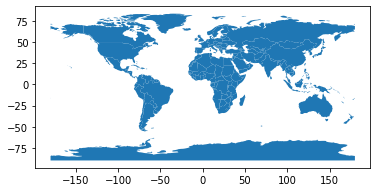

In [22]:
countries.plot()

The `.crs` attribute is given as a dictionary. In this case, it only indicates the EPSG code, but it can also contain the full "proj4" string (in dictionary form). 

Under the hood, GeoPandas uses the `pyproj` / `proj4` libraries to deal with the re-projections.

For more information, see also http://geopandas.readthedocs.io/en/latest/projections.html.

---

There are sometimes good reasons you want to change the coordinate references system of your dataset, for example:

- different sources with different crs -> need to convert to the same crs
- distance-based operations -> if you a crs that has meter units (not degrees)
- plotting in a certain crs (eg to preserve area)

We can convert a GeoDataFrame to another reference system using the `to_crs` function. 

For example, let's convert the countries to the World Mercator projection (http://epsg.io/3395):

In [23]:
# remove Antartica, as the Mercator projection cannot deal with the poles
countries = countries[(countries['name'] != "Antarctica")]

In [24]:
countries_mercator = countries.to_crs(epsg=3395)  # or .to_crs({'init': 'epsg:3395'})

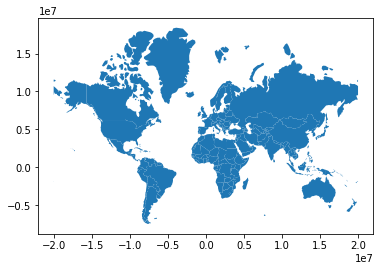

In [25]:
countries_mercator.plot()

Note the different scale of x and y.

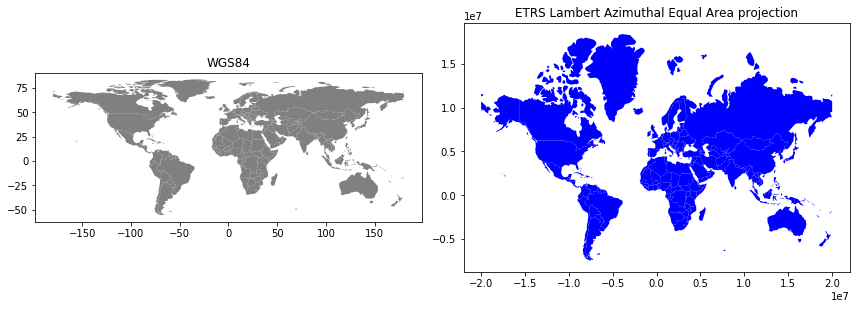

In [26]:
# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
countries.plot(ax=ax1, facecolor='gray');

# Add title
ax1.set_title("WGS84");

# Plot the one with ETRS-LAEA projection
countries_mercator.plot(ax=ax2, facecolor='blue');

# Add title
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection");

# Remove empty white space around the plot
plt.tight_layout()

In [28]:
from pyproj import CRS
ortho = CRS.from_proj4("+proj=ortho +lat_0=45.00 +lon_0=7.0000 +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs")

# Re-project and plot
countries.to_crs(ortho).plot()

# Remove x and y axis
plt.axis('off')
plt.title("Orthographic")

ImportError: cannot import name 'CRS' from 'pyproj' (/opt/conda/envs/gisenv/lib/python3.7/site-packages/pyproj/__init__.py)

## Plotting our different layers together

[(30, 60), (-20, 20)]

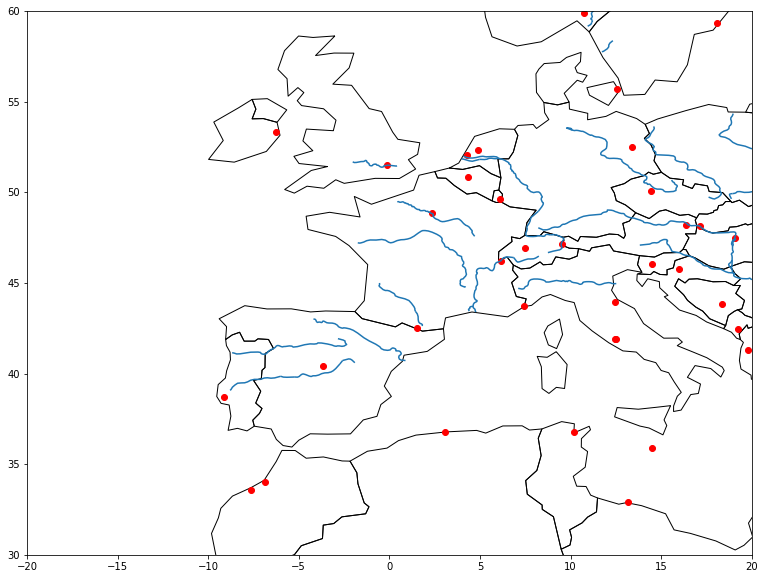

In [29]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20, 20), ylim=(30, 60))

## A bit more on importing and creating GeoDataFrames

### Note on `fiona`

Under the hood, GeoPandas uses the [Fiona library](http://toblerity.org/fiona/) (pythonic interface to GDAL/OGR) to read and write data. GeoPandas provides a more user-friendly wrapper, which is sufficient for most use cases. But sometimes you want more control, and in that case, to read a file with fiona you can do the following:


In [25]:
import fiona
from shapely.geometry import shape,Point, Polygon, LineString
with fiona.drivers():
    with fiona.open("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp") as collection:
        for feature in collection:
            # ... do something with geometry
            geom = shape(feature['geometry'])
            # ... do something with properties
            print(feature['properties']['name'])

Afghanistan
Angola
Albania
United Arab Emirates
Argentina
Armenia
Antarctica
Fr. S. Antarctic Lands
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
Bahamas
Bosnia and Herz.
Belarus
Belize
Bolivia
Brazil
Brunei
Bhutan
Botswana
Central African Rep.
Canada
Switzerland
Chile
China
Côte d'Ivoire
Cameroon
Dem. Rep. Congo
Congo
Colombia
Costa Rica
Cuba
N. Cyprus
Cyprus
Czechia
Germany
Djibouti
Denmark
Dominican Rep.
Algeria
Ecuador
Egypt
Eritrea
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Is.
France
Gabon
United Kingdom
Georgia
Ghana
Guinea
Gambia
Guinea-Bissau
Eq. Guinea
Greece
Greenland
Guatemala
Guyana
Honduras
Croatia
Haiti
Hungary
Indonesia
India
Ireland
Iran
Iraq
Iceland
Israel
Italy
Jamaica
Jordan
Japan
Kazakhstan
Kenya
Kyrgyzstan
Cambodia
South Korea
Kosovo
Kuwait
Laos
Lebanon
Liberia
Libya
Sri Lanka
Lesotho
Lithuania
Luxembourg
Latvia
Morocco
Moldova
Madagascar
Mexico
Macedonia
Mali
Myanmar
Montenegro
Mongolia
Mozambique
Mauritania
Malawi
Malaysia

C:\Users\Lorenzo\.conda\envs\gisenv\lib\site-packages\ipykernel_launcher.py:3: FionaDeprecationWarning: Use fiona.Env() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Constructing a GeoDataFrame manually

In [26]:
gpd.GeoDataFrame({
    'geometry': [Point(1, 1), Point(2, 2)],
    'attribute1': [1, 2],
    'attribute2': [0.1, 0.2]})

,geometry,attribute1,attribute2
0,POINT (1.00000 1.00000),1,0.1
1,POINT (2.00000 2.00000),2,0.2


### Creating a GeoDataFrame from an existing dataframe

For example, if you have lat/lon coordinates in two columns:

In [27]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [28]:
df['Coordinates']  = list(zip(df.Longitude, df.Latitude))

In [29]:
df['Coordinates'] = df['Coordinates'].apply(Point)

In [30]:
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

In [31]:
gdf

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


See http://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html#sphx-glr-gallery-create-geopandas-from-pandas-py for full example

## Calculating distances

In this tutorial, we will calculate distances with projected layers. **Our aim is to find the Euclidean distances from the centroids (midpoints) of all World countries to Turin, Italy.** We will calculate the distance between Turin and other World countries using a metric projection ([Azimuthal Equidistant -projection](https://proj4.org/operations/projections/aeqd.html)) that gives us the distance in meters. Notice, that this projection is slightly less commonly used, but still useful to know. 

- First, let's import necessary modules and continue working with the Wolrds borders:

In [32]:
from pyproj import CRS
from shapely.geometry import Point
import matplotlib.pyplot as plt

- Let's create a GeoDataFrame that contains a single Point representing the location of Helsinki, Finland:

In [33]:
# Create the point representing Helsinki (in WGS84)
to_lon = 7.681847
to_lat = 45.068550

# Create GeoDataFrame
turin = gpd.GeoDataFrame([[Point(to_lon, to_lat)]], geometry='geometry', crs={'init': 'epsg:4326'}, columns=['geometry'])

# Print 
print(turin)

                   geometry
0  POINT (7.68185 45.06855)


As we can see, it is possible to create a GeoDataFrame directly with one line of code. Notice that, here, we specified the CRS directly by passing the crs as Python dictionary `{'init': 'epsg:4326'}` which is one alternative way to define the CRS. We also told that the `geometry` information is stored in column called `'geometry'` that we actually define with parameter `columns=['geometry']`. 

Next, we need to convert this `GeoDataFrame` to "Azimuthal Equidistant" 

    -projection that has useful properties because all points on the map in that projection are at proportionately correct distances from the center point (defined with parameters `lat_0` and `lon_0`), and all points on the map are at the correct direction from the center point. 

To conduct the transformation, we are going to utilize again [pyproj](https://pyproj4.github.io/pyproj) library which is also good at dealing with "special" projections such as the one demonstrated here.

 - We will create a CRS by passing specific parameters to `Proj()` -object that are needed to construct the [Azimuthal Equidistant projection](https://proj4.org/operations/projections/aeqd.html):
    
    - `proj='aeqd'` refers to *projection specifier* that we determine to be Azimuthal Equidistant ('aeqd')
    - `ellps='WGS84'` refers to the [reference ellipsoid](https://en.wikipedia.org/wiki/Reference_ellipsoid) that is a mathematically modelled (based on measurements) surface that approximates the true shape of the world. World Geodetic System (WGS) was established in 1984, hence the name. 
    - `datum='WGS84'` refers to the [Geodetic datum](https://en.wikipedia.org/wiki/Geodetic_datum) that is a coordinate system constituted with a set of reference points that can be used to locate places on Earth.
    - `lat_0` is the latitude coordinate of the center point in the projection
    - `lon_0` is the longitude coordinate of the center point in the projection

In [34]:
# Define the projection using the coordinates of our Turin point (to_lat, to_lon) as the center point
# The .srs here returns the text presentation of the projection
aeqd = CRS(proj='aeqd', ellps='WGS84', datum='WGS84', lat_0=to_lat, lon_0=to_lon).srs

# Reproject to aeqd projection using Proj4-string
turin = turin.to_crs(crs=aeqd)

# Print the data
print(turin)

# Print the crs
print('\nCRS:\n', turin.crs)

                  geometry
0  POINT (0.00000 0.00000)

CRS:
 +proj=aeqd +ellps=WGS84 +datum=WGS84 +lat_0=45.06855 +lon_0=7.681847 +type=crs


As we can see the projection is indeed centered to Turin as the 0-position (in meters) in both x and y is defined now directly into the location where we defined Helsinki to be located (you'll understand soon better when seeing the map). 

Next we want to transform the `countries_mercator` data into the desired projection. 

- Let's create a new copy of our GeoDataFrame into a variable called `borders_aeqd`: 

In [35]:
# Create a copy
eu_borders_aeqd = countries_mercator[countries_mercator.continent=='Europe'].copy()

- Let's now reproject our World borders data into the Azimuthal Equidistant projection that was centered into Helsinki:

In [36]:
# Reproject to aeqd projection that we defined earlier
eu_borders_aeqd = eu_borders_aeqd.to_crs(crs=aeqd)

# Print 
print(eu_borders_aeqd.head(2))

  iso_a3     name continent    pop_est  gdp_md_est  \
2    ALB  Albania    Europe  3047987.0     33900.0   
9    AUT  Austria    Europe  8754413.0    416600.0   

                                            geometry  
2  POLYGON ((1121147.651 -378926.354, 1124037.797...  
9  POLYGON ((690915.064 380077.903, 690647.278 33...  


Okay, now we can see that the coordinates in `geometry` column are fairly large numbers as they represents the distance in meters from Turin to different directions. 

- Let's plot the World borders and the location of Turin to get a better understanding how our projection has worked out:

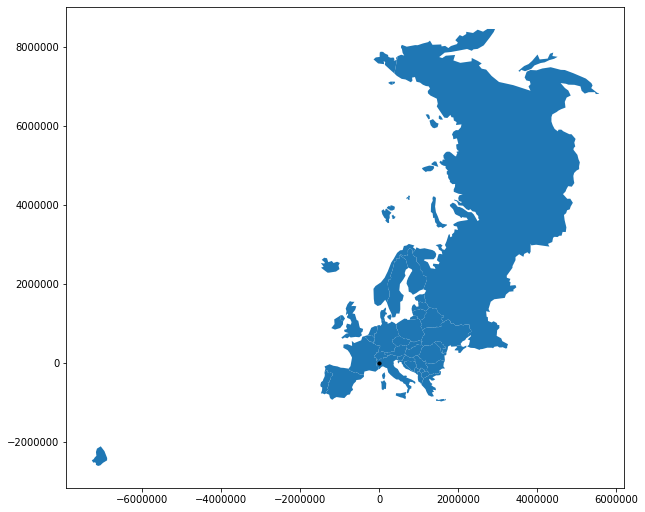

In [37]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))

# Plot the country borders
eu_borders_aeqd.plot(ax=ax)

# Plot the Helsinki point on top of the borders using the same axis
turin.plot(ax=ax, color='black', markersize=10)

As we can see from the map, the projection is indeed centered to Turin as the 0-position of the x and y axis is located where Helsinki is positioned. Now the coordinate values are showing the distance from Turin (black point) to different directions (South, North, East and West) in meters. 

Next, our goal is to calculate the distance from all countries to Turin. To be able to do that, we need to calculate the centroids for all the Polygons representing the boundaries of European countries. 

- This can be done easily in Geopandas by using the `centroid` attribute:

In [38]:
eu_borders_aeqd['centroid'] = eu_borders_aeqd.centroid
print(eu_borders_aeqd.head(2))

  iso_a3     name continent    pop_est  gdp_md_est  \
2    ALB  Albania    Europe  3047987.0     33900.0   
9    AUT  Austria    Europe  8754413.0    416600.0   

                                            geometry  \
2  POLYGON ((1121147.651 -378926.354, 1124037.797...   
9  POLYGON ((690915.064 380077.903, 690647.278 33...   

                          centroid  
2  POINT (1034148.239 -359681.617)  
9    POINT (479231.537 302929.676)  


Now we have created a new column called `centroid` that has the Point geometries representing the centroids of each Polygon (in Azimuthal Equidistant projection).

Next, we will calculate the distances between the country centroids and Turin. For doing this, we could use `iterrows()` -function that we have used earlier, but here we will demonstrate a more efficient (faster) technique to go through all rows in (Geo)DataFrame by using `apply()` -function. 

The [apply()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) -function can give a big boost in performance over the `iterrows()` and it is the recommendable way of iterating over the rows in (Geo)DataFrames. Here, we will see how to use that to calculate the distance between the centroids and Turin. 

 - First, we will create a dedicated function for calculating the distances called `calculate_distance()`:

In [39]:
def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between Point geometries.

    Parameters
    ----------
    dest_geom : shapely.Point
       A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
       A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
       A name of the target column where the result will be stored.

    Returns
    -------
    
    Distance in kilometers that will be stored in 'target_col'.
    """
    
    # Calculate the distances
    dist = row[src_col].distance(dest_geom)

    # Convert into kilometers
    dist_km = dist / 1000

    # Assign the distance to the original data
    row[target_col] = dist_km
    return row

Here, the parameter `row` is used to pass the data from each row of our GeoDataFrame into the function. Other paramaters are used for passing other necessary information for using our function.

- Before using our function and calculating the distances between Turin and centroids, we need to get the Shapely point geometry from the re-projected Turin center point that we can pass to our function (into the `dest_geom` -parameter. We can use the `loc` -functionality to retrieve the value from specific index and column:

In [40]:
# Retrieve the geometry from Helsinki GeoDataFrame
turin_geom = turin.loc[0, 'geometry']
print(turin_geom)

POINT (0 0)


Now we are ready to use our function with `apply()`. When using the function, it is important to specify the direction of iteration that should be in our case specified with `axis=1`. This ensures that the calculations are done row by row (instead of column-wise).
  
  - When iterating over a DataFrame or GeoDataFrame, apply function is used by following the format `GeoDataFrame.apply(name_of_your_function, param1, param2, param3,  axis=1)`
  
    - Notice that the first parameter is always the name of the function that you want to use **WITHOUT** the parentheses. This will start the iteration using the function you have created, and the values of the row will be inserted into the `row` parameter / attribute inside the function (see above). 

In [41]:
# Calculate the distances using our custom function called 'calculate_distance'
eu_borders_aeqd = eu_borders_aeqd.apply(calculate_distance, dest_geom=turin_geom, src_col='centroid', target_col='dist_to_Turin', axis=1)
print(eu_borders_aeqd.head(10))

   iso_a3              name continent     pop_est  gdp_md_est  \
2     ALB           Albania    Europe   3047987.0     33900.0   
9     AUT           Austria    Europe   8754413.0    416600.0   
12    BEL           Belgium    Europe  11491346.0    508600.0   
16    BGR          Bulgaria    Europe   7101510.0    143100.0   
18    BIH  Bosnia and Herz.    Europe   3856181.0     42530.0   
19    BLR           Belarus    Europe   9549747.0    165400.0   
28    CHE       Switzerland    Europe   8236303.0    496300.0   
40    CZE           Czechia    Europe  10674723.0    350900.0   
41    DEU           Germany    Europe  80594017.0   3979000.0   
43    DNK           Denmark    Europe   5605948.0    264800.0   

                                             geometry  \
2   POLYGON ((1121147.651 -378926.354, 1124037.797...   
9   POLYGON ((690915.064 380077.903, 690647.278 33...   
12  POLYGON ((-254083.312 695169.073, -188489.865 ...   
16  POLYGON ((1189652.548 17523.457, 1220751.354 -...   

Great! Now we have successfully calculated the distances between the Polygon centroids and Turin. 😎


- Let's check what is the longest and mean distance to Turin from the centroids of other European countries:

In [42]:
# Calculat the maximum and average distance
max_dist = eu_borders_aeqd['dist_to_Turin'].max()
mean_dist = eu_borders_aeqd['dist_to_Turin'].mean()

print("Maximum distance to Turin is %.0f km, and the mean distance is %.0f km." % (max_dist, mean_dist))

Maximum distance to Turin is 5538 km, and the mean distance is 1361 km.


Notice: If you would like to calculate distances between multiple locations across the globe, it is recommended to use [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula) to do the calculations. [Haversine](https://github.com/mapado/haversine) package in Python provides an easy-to-use function for calculating these
   based on latitude and longitude values.


That's it! During this tutorial we have seen how to calculate distances between locations and using `apply()` -function to iterate over rows more efficiently than using `iterrows()`. 